# Connecting to drive

In [ ]:
# Connect to drive
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/My Drive/Colab Notebooks/Statistical Learning for Healthcare Data/Project/Scripts/Final code

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
[Errno 2] No such file or directory: '/gdrive/My Drive/Colab Notebooks/Statistical Learning for Healthcare Data/Project/Scripts/Final code'
/content


# Data loading

In this section, we load our dataset and we explore it.

In [ ]:
# Set seed for reproducibility
import random
random.seed(562023)

In [ ]:
# Load the dataset
import pandas as pd

df = pd.read_csv('Myocardial infarction complications Database.csv', sep = ',')
df.head()

FileNotFoundError: ignored

In [ ]:
# Load the dataset from local drive
import pandas as pd
import io
from google.colab import files

uploaded = files.upload()
data = pd.read_csv(io.BytesIO(uploaded['Myocardial infarction complications Database.csv']))
df = pd.DataFrame(data=data)


Saving Myocardial infarction complications Database.csv to Myocardial infarction complications Database.csv


In [ ]:
# Dataframe dimensions
df.shape

(1700, 124)

# Target variable

Our goal is to correctly classify patients in alive (0) or dead (1). Thus, we do not need the features of possible complications and we are not interested in the cause of death of the patients.

In this section we create a new features called 'Target' which takes value 0 if the patient is alive, 1 if they are dead. Then, we get rid of all the features of the possible complications.

In [ ]:
# Target variable
df['Target'] = df['LET_IS']
df.loc[df.Target != 0,'Target'] = 1
df.head()

,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,...,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS,Target
0,1,77.0,1,2.0,1.0,1.0,2.0,NaN,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,3,52.0,1,0.0,0.0,0.0,2.0,NaN,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,4,68.0,0,0.0,0.0,0.0,2.0,NaN,2.0,0.0,...,0,0,0,0,0,1,0,0,0,0
4,5,60.0,1,0.0,0.0,0.0,2.0,NaN,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Drop columns of outcomes
df = df.drop(['FIBR_PREDS', 'PREDS_TAH', 'JELUD_TAH', 'FIBR_JELUD', 'A_V_BLOK',
              'OTEK_LANC', 'RAZRIV', 'DRESSLER', 'ZSN', 'REC_IM', 'P_IM_STEN',
              'LET_IS'], axis = 1)

df.head()

,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,...,NOT_NA_2_n,NOT_NA_3_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n,Target
0,1,77.0,1,2.0,1.0,1.0,2.0,NaN,3.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0
1,2,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0
2,3,52.0,1,0.0,0.0,0.0,2.0,NaN,2.0,0.0,...,2.0,2.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0
3,4,68.0,0,0.0,0.0,0.0,2.0,NaN,2.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0
4,5,60.0,1,0.0,0.0,0.0,2.0,NaN,3.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0


In [ ]:
# Dataframe dimensions
df.shape

(1700, 113)

# Data cleaning

First, we plot the number of missing values in each feature of the dataframe.

In [ ]:
# Vector containing the NaN of each variables
nanvector = df.isna().sum()
nanvector_sorted = nanvector.sort_values(ascending = True)

# Print
for i in range(0,df.shape[1]):
  print(nanvector_sorted.index[i], nanvector_sorted[i],
        '(', nanvector_sorted[i]*100/df.shape[0], '%)')

ID 0 ( 0.0 %)
SEX 0 ( 0.0 %)
Target 0 ( 0.0 %)
IM_PG_P 1 ( 0.058823529411764705 %)
INF_ANAM 4 ( 0.23529411764705882 %)
NA_R_1_n 5 ( 0.29411764705882354 %)
zab_leg_01 7 ( 0.4117647058823529 %)
zab_leg_02 7 ( 0.4117647058823529 %)
zab_leg_03 7 ( 0.4117647058823529 %)
zab_leg_04 7 ( 0.4117647058823529 %)
zab_leg_06 7 ( 0.4117647058823529 %)
SIM_GIPERT 8 ( 0.47058823529411764 %)
AGE 8 ( 0.47058823529411764 %)
NITR_S 9 ( 0.5294117647058824 %)
GB 9 ( 0.5294117647058824 %)
endocr_03 10 ( 0.5882352941176471 %)
fibr_ter_07 10 ( 0.5882352941176471 %)
NOT_NA_1_n 10 ( 0.5882352941176471 %)
fibr_ter_06 10 ( 0.5882352941176471 %)
LID_S_n 10 ( 0.5882352941176471 %)
fibr_ter_05 10 ( 0.5882352941176471 %)
fibr_ter_03 10 ( 0.5882352941176471 %)
fibr_ter_02 10 ( 0.5882352941176471 %)
fibr_ter_01 10 ( 0.5882352941176471 %)
fibr_ter_08 10 ( 0.5882352941176471 %)
endocr_02 10 ( 0.5882352941176471 %)
B_BLOK_S_n 11 ( 0.6470588235294118 %)
endocr_01 11 ( 0.6470588235294118 %)
O_L_POST 12 ( 0.7058823529411765 %

In [ ]:
# Missing values in the dataset
print("Number of missing values in the dataset: ", df.isna().sum().sum(), "(",
      df.isna().sum().sum()/(df.shape[0]*df.shape[1])*100, "%)")

Number of missing values in the dataset:  15974 ( 8.315460697553357 %)


We start by deleting the most irrelevants features which are the ones with more than 60% of missing values.

In [ ]:
# Elimination of variables
# Parameters
nrow = df.shape[0]
ncol = df.shape[1]
threshold = 0.6
nan_col = df.isna().sum()

for i in range(ncol):
  # Check % missign values
  if nan_col[i] / nrow > threshold:
    # Drop the column
    print("Eliminata la colonna ", nan_col.index[i], ", NA =",
          nan_col[i] ,"'",)
    df = df.drop(nan_col.index[i], axis = 1)

# Check
print(df.shape)

Eliminata la colonna  IBS_NASL , NA = 1628 '
Eliminata la colonna  S_AD_KBRIG , NA = 1076 '
Eliminata la colonna  D_AD_KBRIG , NA = 1076 '
Eliminata la colonna  KFK_BLOOD , NA = 1696 '
(1700, 109)


We have deleted:
* IBS_NASL which is the heredity on CHD
* S_AD_KBRIG and D_AD_KBRIG which are the systolic and diastolic blood pressures according to the Emergency Cardiology Team. We still have the pressures taken in ICU
* KFK_BLOOD which is the serum CPK content

We procede by deleting the rows which contains "too many" missing values, but first we need to reasonbly quantify "too many".

In [ ]:
# Finding the right amout of patients to delete
threshold = [0.5, 0.4, 0.3, 0.2, 0.1]

for eps in threshold:
  df_del = df
  total = df_del.shape[0]
  ncol = df_del.shape[1]

  for i in df.ID-1:
    # Check % missign values
    if df_del.loc[i].isna().sum().sum() / ncol > eps:
      # Drop the row
      df_del = df_del.drop(index = i)

  print("Choosing to delete the rows which as more than ", eps*100,
        "% of missing values, we loose the ", 100*(total-df_del.shape[0])/total,
        "% of data")

Choosing to delete the rows which as more than  50.0 % of missing values, we loose the  0.058823529411764705 % of data
Choosing to delete the rows which as more than  40.0 % of missing values, we loose the  0.23529411764705882 % of data
Choosing to delete the rows which as more than  30.0 % of missing values, we loose the  1.9411764705882353 % of data
Choosing to delete the rows which as more than  20.0 % of missing values, we loose the  7.882352941176471 % of data
Choosing to delete the rows which as more than  10.0 % of missing values, we loose the  14.0 % of data


We decide to get rid of all patients having more than 20% of missing values loosing up to the 8% of data.

In [ ]:
# Elimination of patients with more than 20% of missing values
# Parameters
ncol = df.shape[1]
threshold = 0.2

for i in df.ID-1:
  # Check % missign values
  if df.loc[i].isna().sum().sum() / ncol > threshold:
    # Drop the row
    df = df.drop(index = i)

# Check
df.shape

(1566, 109)

In [ ]:
# Missing values in the dataset
print("Number of missing values in the dataset: ", df.isna().sum().sum(), "(",
      df.isna().sum().sum()/(df.shape[0]*df.shape[1])*100, "%)")

Number of missing values in the dataset:  6428 ( 3.7658031330919655 %)


### Exploratory data analysis for continuous features

In this section, we look for a way of dealing with the outliers of the very few continuous features of our dataframe.

In [ ]:
# Import
import matplotlib.pyplot as plt
import seaborn as sns

Age of the patients.

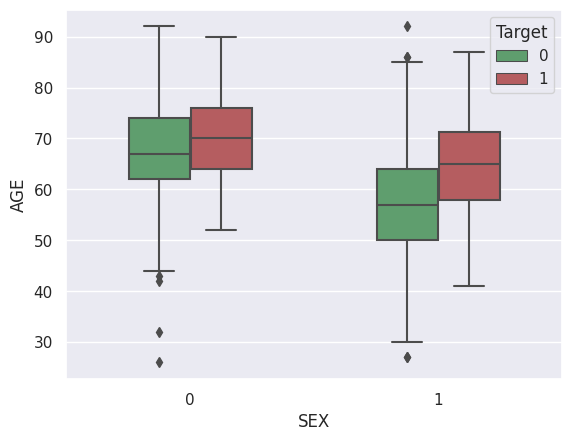

In [ ]:
# Boxplot for AGE
sns.set(style="darkgrid")
my_pal = {Target: 'r' if (Target ==1) else 'g' for Target in df.Target.unique()}
sns.boxplot(x='SEX', y='AGE', hue='Target', data=df, palette=my_pal, width=0.5)
plt.show()

Measuraments of the blood pressure.

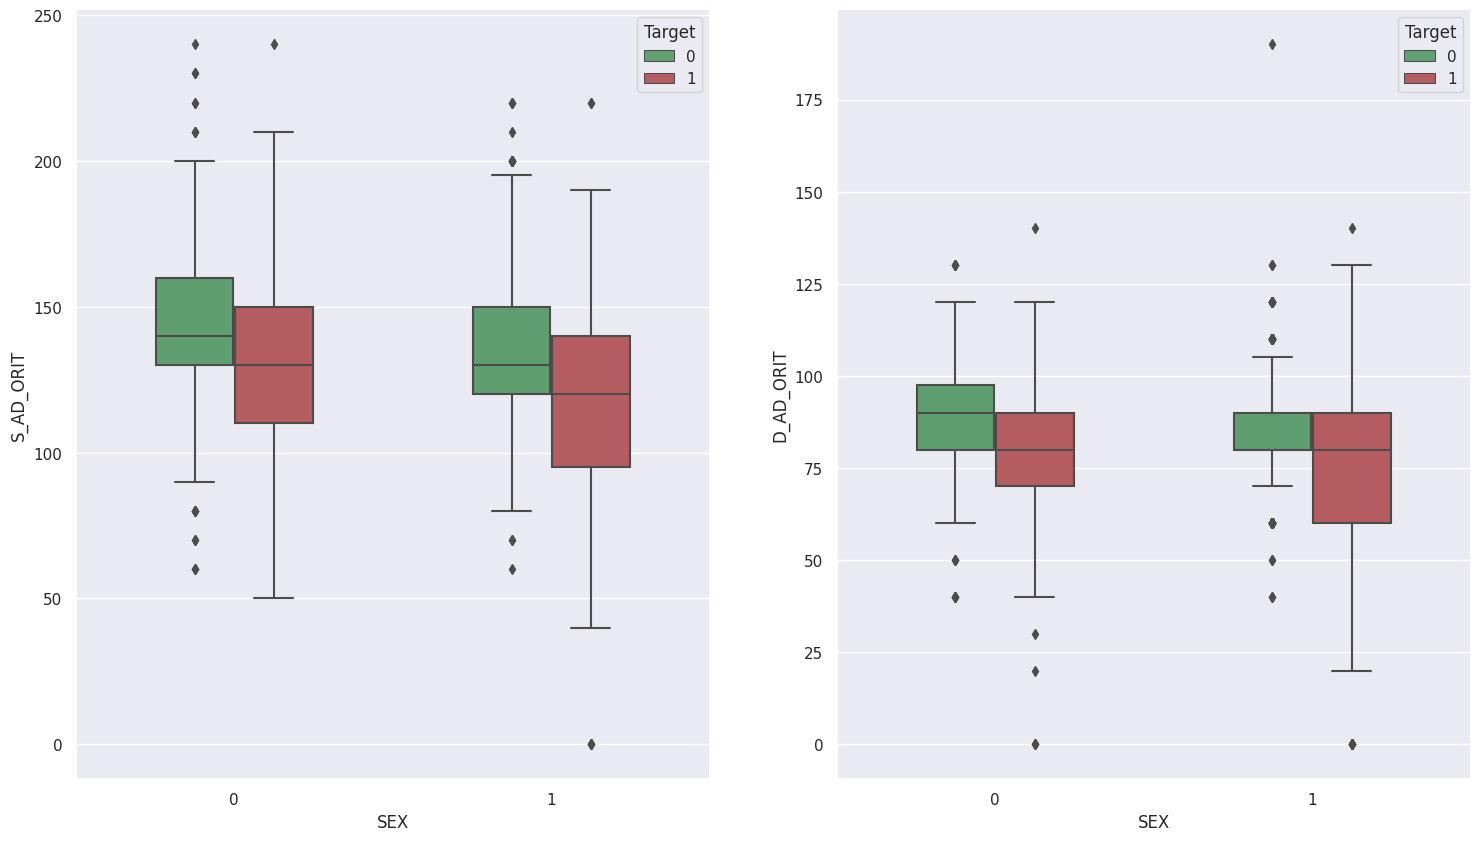

In [ ]:
# Boxplot for blood pressures
sns.set(style="darkgrid")
fig, axes = plt.subplots(1, 2, figsize=(18, 10))
my_pal = {Target: 'r' if (Target ==1) else 'g' for Target in df.Target.unique()}
sns.boxplot(ax=axes[0], x='SEX', y='S_AD_ORIT', hue='Target', data=df, palette=my_pal, width=0.5)
sns.boxplot(ax=axes[1], x='SEX', y='D_AD_ORIT', hue='Target', data=df, palette=my_pal, width=0.5)
plt.show()

Since the blood pressure can not be 0, we assume that those vales are to be considered as missing.

In [ ]:
# Addig missing values
import math
df.loc[df.S_AD_ORIT == 0,'S_AD_ORIT'] = math.nan
df.loc[df.D_AD_ORIT == 0,'S_AD_ORIT'] = math.nan
df.loc[df.D_AD_ORIT == 0,'D_AD_ORIT'] = math.nan

Systolic blod pressure cannot be lower than the diastolic blood pressure.

In [ ]:
# Elimination of problematic patient
df = df.drop(df.loc[(df.S_AD_ORIT - df.D_AD_ORIT) < 0].index)

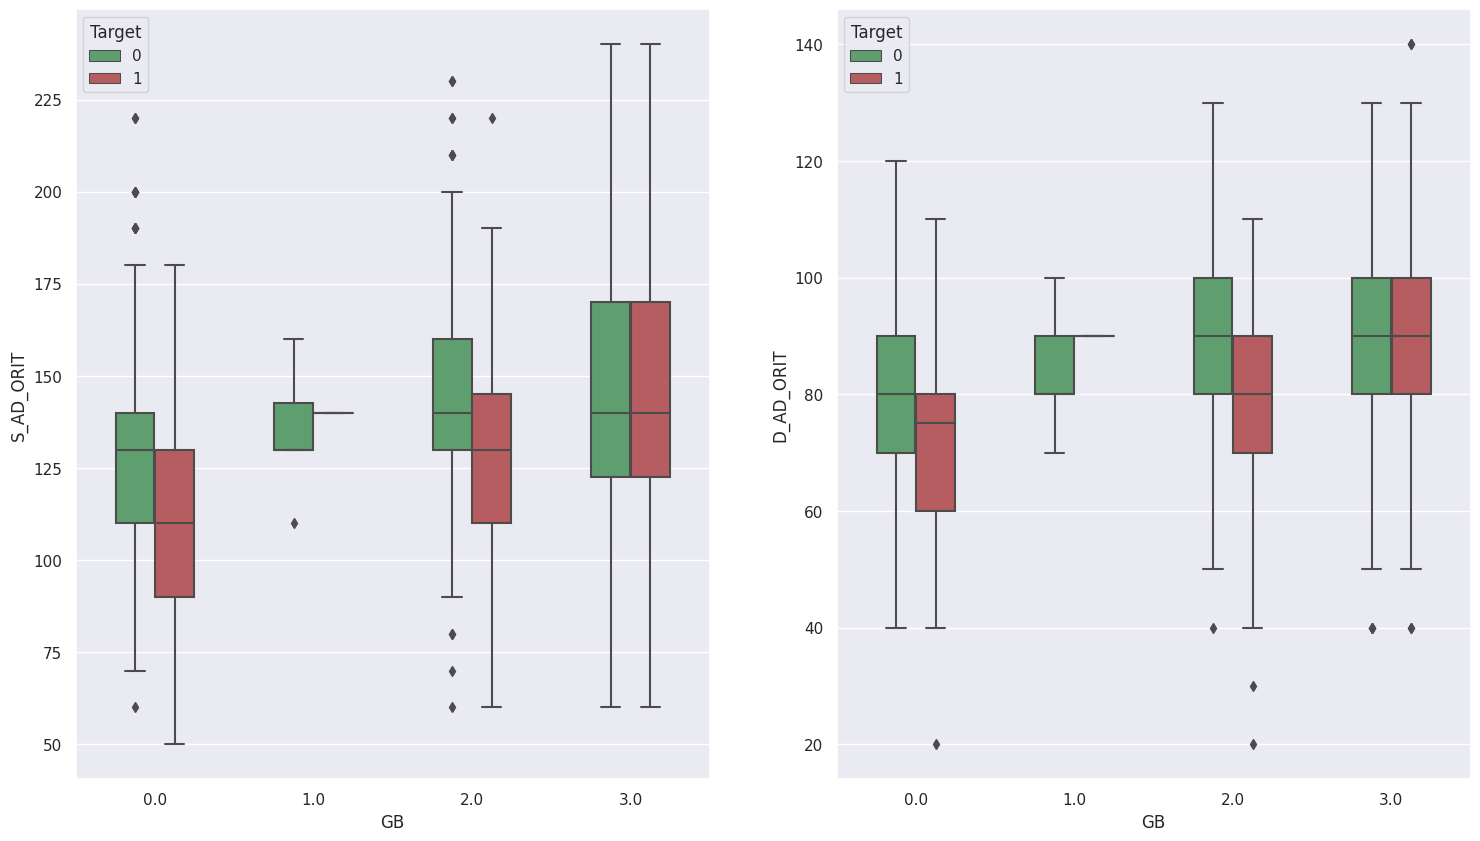

In [ ]:
# Boxplot for blood pressures
sns.set(style="darkgrid")
fig, axes = plt.subplots(1, 2, figsize=(18, 10))
my_pal = {Target: 'r' if (Target ==1) else 'g' for Target in df.Target.unique()}
sns.boxplot(ax=axes[0], x='GB', y='S_AD_ORIT', hue='Target', data=df, palette=my_pal, width=0.5)
sns.boxplot(ax=axes[1], x='GB', y='D_AD_ORIT', hue='Target', data=df, palette=my_pal, width=0.5)
plt.show()

Variables regarding blood analysis.

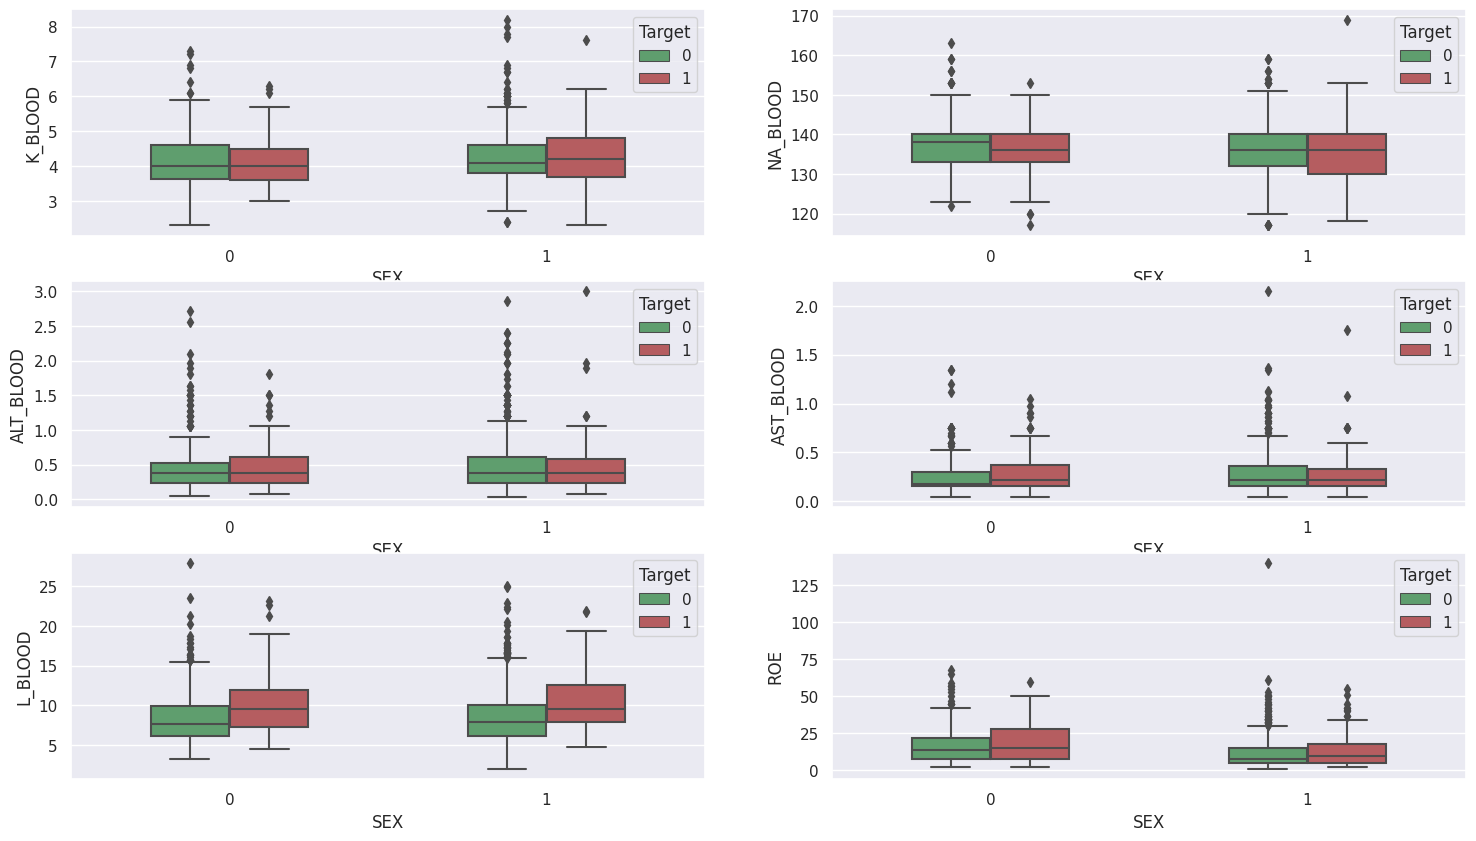

In [ ]:
# Box-plot for the serum contents
sns.set(style="darkgrid")
fig, axes = plt.subplots(3, 2, figsize=(18, 10))
my_pal = {Target: 'r' if (Target ==1) else 'g' for Target in df.Target.unique()}
sns.boxplot(ax=axes[0,0], x='SEX', y='K_BLOOD', hue='Target', data=df, palette=my_pal, width=0.5)
sns.boxplot(ax=axes[0,1], x='SEX', y='NA_BLOOD', hue='Target', data=df, palette=my_pal, width=0.5)
sns.boxplot(ax=axes[1,0], x='SEX', y='ALT_BLOOD', hue='Target', data=df, palette=my_pal, width=0.5)
sns.boxplot(ax=axes[1,1], x='SEX', y='AST_BLOOD', hue='Target', data=df, palette=my_pal, width=0.5)
sns.boxplot(ax=axes[2,0], x='SEX', y='L_BLOOD', hue='Target', data=df, palette=my_pal, width=0.5)
sns.boxplot(ax=axes[2,1], x='SEX', y='ROE', hue='Target', data=df, palette=my_pal, width=0.5)
plt.show()

We modify the length of the box-plot whiskers to see if the outliers situation changes.

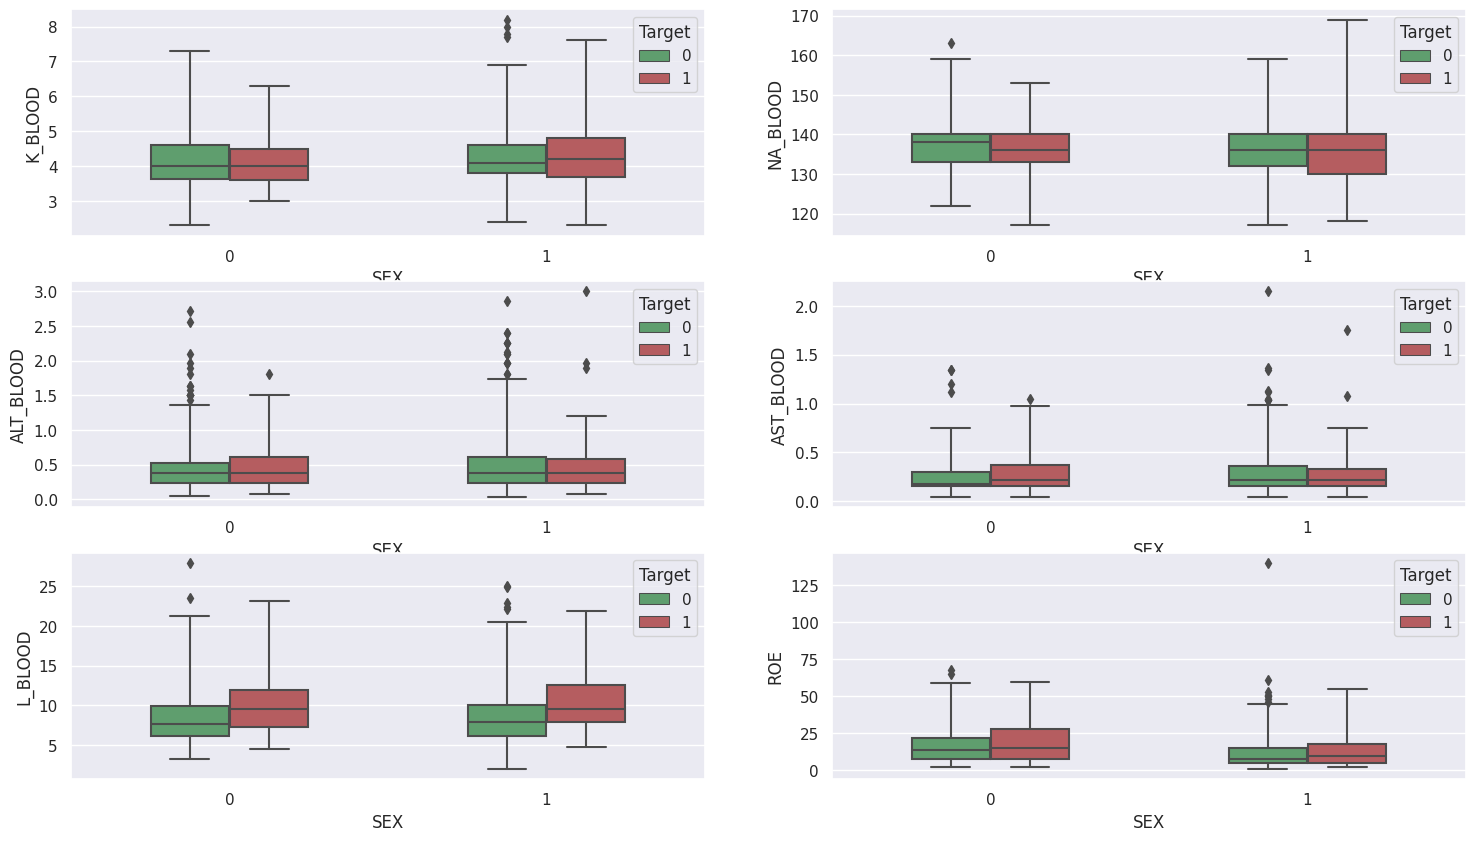

In [ ]:
# We double the length of the whiskers of the box-plot
sns.set(style="darkgrid")
fig, axes = plt.subplots(3, 2, figsize=(18, 10))
my_pal = {Target: 'r' if (Target ==1) else 'g' for Target in df.Target.unique()}
sns.boxplot(ax=axes[0,0], x='SEX', y='K_BLOOD', hue='Target', data=df, palette=my_pal, width=0.5, whis=3)
sns.boxplot(ax=axes[0,1], x='SEX', y='NA_BLOOD', hue='Target', data=df, palette=my_pal, width=0.5, whis=3)
sns.boxplot(ax=axes[1,0], x='SEX', y='ALT_BLOOD', hue='Target', data=df, palette=my_pal, width=0.5, whis=3)
sns.boxplot(ax=axes[1,1], x='SEX', y='AST_BLOOD', hue='Target', data=df, palette=my_pal, width=0.5, whis=3)
sns.boxplot(ax=axes[2,0], x='SEX', y='L_BLOOD', hue='Target', data=df, palette=my_pal, width=0.5, whis=3)
sns.boxplot(ax=axes[2,1], x='SEX', y='ROE', hue='Target', data=df, palette=my_pal, width=0.5, whis=3)
plt.show()

Since we do not find enough evidence, in the literature, that these values are absurd, we decide to get rid of those which are "very far" from the rest of the data points, but only if the corresponding patient has missing values. This requires a case-by-case study.

There are some easy cases where we can just fix a threshold and study the problematic data points, like:
* ALT_BLOOD, where we get read of patients for which ALT_BLOOD >= 2.5
* AST_BLOOD, where we get read of patients for which AST_BLOOD >= 1.5
* L_BLOOD, where we get read of patients for which L_BLOOD >= 25
* ROE, where we get read of patients for which ROE >= 75

In [ ]:
# ALT_BLOOD
row = df.loc[df.ALT_BLOOD >= 2.5].index

count_na = 0

for i in row:
  if df.loc[i].isna().sum().sum() > 0:
    df = df.drop(i)
    count_na = count_na + 1

print("We got rid of ", count_na, " problematic patient(s)")

We got rid of  3  problematic patient(s)


In [ ]:
# AST_BLOOD
row = df.loc[df.AST_BLOOD >= 1.25].index

count_na = 0

for i in row:
  if df.loc[i].isna().sum().sum() > 0:
    df = df.drop(i)
    count_na = count_na + 1

print("We got rid of ", count_na, " problematic patient(s)")

We got rid of  1  problematic patient(s)


In [ ]:
# L_BLOOD
row = df.loc[df.L_BLOOD >= 25].index

count_na = 0

for i in row:
  if df.loc[i].isna().sum().sum() > 0:
    df = df.drop(i)
    count_na = count_na + 1

print("We got rid of ", count_na, " problematic patient(s)")

We got rid of  2  problematic patient(s)


In [ ]:
# ROE
row = df.loc[df.ROE >= 75].index

count_na = 0

for i in row:
  if df.loc[i].isna().sum().sum() > 0:
    df = df.drop(i)
    count_na = count_na + 1

print("We got rid of ", count_na, " problematic patient(s)")

We got rid of  0  problematic patient(s)


For K_BLOOD and NA_BLOOD we need a finer evaluation

In [ ]:
# K_BLOOD
row = df.loc[(df.K_BLOOD >= 7) & (df.SEX == 1) & (df.Target == 0)].index

count_na = 0

for i in row:
  if df.loc[i].isna().sum().sum() > 0:
    df = df.drop(i)
    count_na = count_na + 1

print("We got rid of ", count_na, " problematic patient(s)")

We got rid of  3  problematic patient(s)


In [ ]:
# NA_BLOOD
row = df.loc[(df.NA_BLOOD >= 160) & (df.SEX == 0) & (df.Target == 0)].index

count_na = 0

for i in row:
  if df.loc[i].isna().sum().sum() > 0:
    df = df.drop(i)
    count_na = count_na + 1

print("We got rid of ", count_na, " problematic patient(s)")

We got rid of  1  problematic patient(s)


Check again the outliers for the serum contents features.

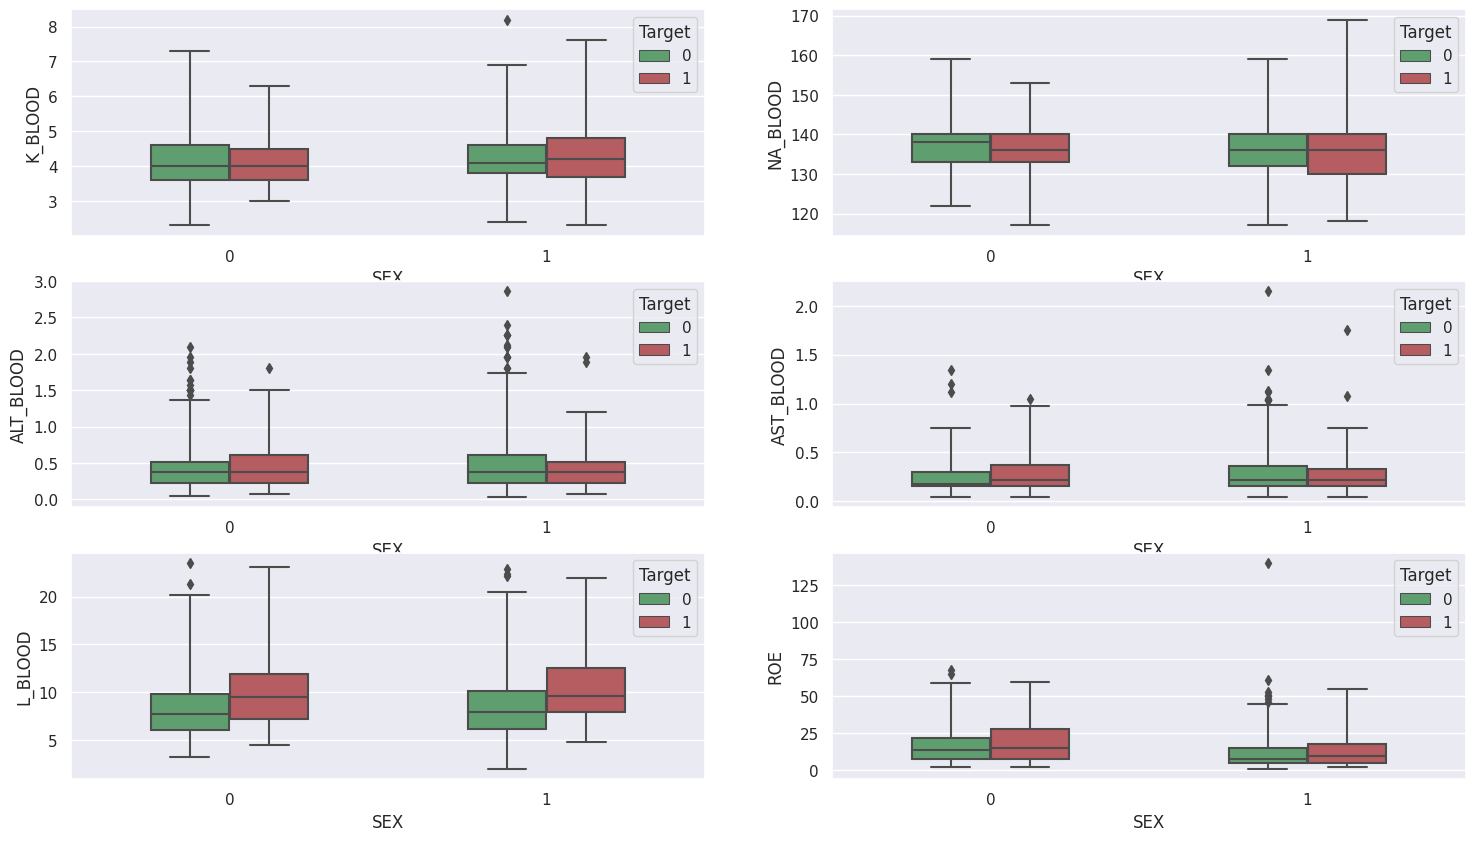

In [ ]:
# We double the length of the whiskers of the box-plot
sns.set(style="darkgrid")
fig, axes = plt.subplots(3, 2, figsize=(18, 10))
my_pal = {Target: 'r' if (Target ==1) else 'g' for Target in df.Target.unique()}
sns.boxplot(ax=axes[0,0], x='SEX', y='K_BLOOD', hue='Target', data=df, palette=my_pal, width=0.5, whis=3)
sns.boxplot(ax=axes[0,1], x='SEX', y='NA_BLOOD', hue='Target', data=df, palette=my_pal, width=0.5, whis=3)
sns.boxplot(ax=axes[1,0], x='SEX', y='ALT_BLOOD', hue='Target', data=df, palette=my_pal, width=0.5, whis=3)
sns.boxplot(ax=axes[1,1], x='SEX', y='AST_BLOOD', hue='Target', data=df, palette=my_pal, width=0.5, whis=3)
sns.boxplot(ax=axes[2,0], x='SEX', y='L_BLOOD', hue='Target', data=df, palette=my_pal, width=0.5, whis=3)
sns.boxplot(ax=axes[2,1], x='SEX', y='ROE', hue='Target', data=df, palette=my_pal, width=0.5, whis=3)
plt.show()

In [ ]:
# Elimination
df = df.drop(df.loc[df.ROE > 125].index)

Correlation between continuous features and the target variable.

<Axes: >

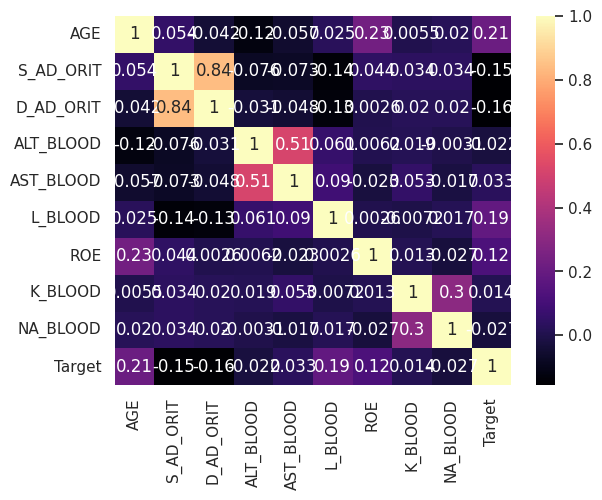

In [ ]:
# Correlation between continuous features and target variable
var_cont = ['AGE', 'S_AD_ORIT', 'D_AD_ORIT', 'ALT_BLOOD', 'AST_BLOOD', 'L_BLOOD',
             'ROE', 'K_BLOOD', 'NA_BLOOD', 'Target']
sns.heatmap(df[var_cont].corr(),annot=True,cmap='magma')

In [ ]:
# Check
print(df.shape)

# Missing values in the dataset
print("Number of missing values in the dataset: ", df.isna().sum().sum(), "(",
      df.isna().sum().sum()/(df.shape[0]*df.shape[1])*100, "%)")

(1554, 109)
Number of missing values in the dataset:  6393 ( 3.7742198292657005 %)


### Check point on the missing values

In [ ]:
# Vector containing the NaN of each variables
nanvector = df.isna().sum()
nanvector_sorted = nanvector.sort_values(ascending = True)

# Print
for i in range(0,df.shape[1]):
  print(nanvector_sorted.index[i], nanvector_sorted[i],
        '(', nanvector_sorted[i]*100/df.shape[0], '%)')

ID 0 ( 0.0 %)
n_r_ecg_p_10 0 ( 0.0 %)
n_r_ecg_p_09 0 ( 0.0 %)
n_r_ecg_p_08 0 ( 0.0 %)
n_r_ecg_p_06 0 ( 0.0 %)
n_r_ecg_p_05 0 ( 0.0 %)
n_r_ecg_p_04 0 ( 0.0 %)
n_r_ecg_p_02 0 ( 0.0 %)
n_r_ecg_p_01 0 ( 0.0 %)
n_r_ecg_p_03 0 ( 0.0 %)
SEX 0 ( 0.0 %)
Target 0 ( 0.0 %)
np_09 1 ( 0.06435006435006435 %)
INF_ANAM 1 ( 0.06435006435006435 %)
IM_PG_P 1 ( 0.06435006435006435 %)
np_01 1 ( 0.06435006435006435 %)
np_04 1 ( 0.06435006435006435 %)
np_05 1 ( 0.06435006435006435 %)
np_07 1 ( 0.06435006435006435 %)
np_08 1 ( 0.06435006435006435 %)
np_10 1 ( 0.06435006435006435 %)
n_p_ecg_p_10 2 ( 0.1287001287001287 %)
n_p_ecg_p_09 2 ( 0.1287001287001287 %)
GB 2 ( 0.1287001287001287 %)
n_p_ecg_p_08 2 ( 0.1287001287001287 %)
n_p_ecg_p_07 2 ( 0.1287001287001287 %)
n_p_ecg_p_06 2 ( 0.1287001287001287 %)
SIM_GIPERT 2 ( 0.1287001287001287 %)
n_p_ecg_p_04 2 ( 0.1287001287001287 %)
n_p_ecg_p_12 2 ( 0.1287001287001287 %)
n_p_ecg_p_03 2 ( 0.1287001287001287 %)
n_p_ecg_p_01 2 ( 0.1287001287001287 %)
n_p_ecg_p_05 2 ( 0

In [ ]:
# For missing values imputation via MICE
df_mice = df

# Manual missing values imputation

In [ ]:
# N. variables with < 20% of missing values
count = 0

for i in range(0,df.shape[1]):
  if nanvector_sorted[i]/df.shape[0] < 0.2:
    count = count + 1

print("The features containing less than 20% of missing values are the ",
      count/df.shape[1]*100, "% of the total")

The features containing less than 20% of missing values are the  93.57798165137615 % of the total


### Binary and descrete features with < 20% missing values

We start the imputation with the binary and descrete variables by "most frequent class":

In [ ]:
# Defining the variables to be imputed
variables = ['INF_ANAM', 'STENOK_AN', 'FK_STENOK', 'IBS_POST', 'GB', 'SIM_GIPERT',
             'DLIT_AG', 'ZSN_A', 'nr_11', 'nr_01', 'nr_02', 'nr_03', 'nr_04',
             'nr_07', 'nr_08', 'np_01', 'np_04', 'np_05', 'np_07', 'np_08',
             'np_09', 'np_10', 'endocr_01', 'endocr_02', 'endocr_03', 'zab_leg_01',
             'zab_leg_02', 'zab_leg_03', 'zab_leg_04', 'zab_leg_06', 'O_L_POST',
             'K_SH_POST', 'MP_TP_POST', 'SVT_POST', 'GT_POST', 'FIB_G_POST',
             'ant_im', 'lat_im', 'inf_im', 'post_im', 'IM_PG_P', 'ritm_ecg_p_01',
             'ritm_ecg_p_02', 'ritm_ecg_p_04', 'ritm_ecg_p_06', 'ritm_ecg_p_07',
             'ritm_ecg_p_08', 'n_p_ecg_p_01', 'n_p_ecg_p_03', 'n_p_ecg_p_04',
             'n_p_ecg_p_05', 'n_p_ecg_p_06', 'n_p_ecg_p_07', 'n_p_ecg_p_08',
             'n_p_ecg_p_09', 'n_p_ecg_p_10', 'n_p_ecg_p_11', 'n_p_ecg_p_12',
             'fibr_ter_01', 'fibr_ter_02', 'fibr_ter_03', 'fibr_ter_05',
             'fibr_ter_06', 'fibr_ter_07', 'fibr_ter_08', 'TIME_B_S', 'R_AB_1_n',
             'R_AB_2_n', 'R_AB_3_n', 'NITR_S', 'NA_R_1_n', 'NA_R_2_n', 'NA_R_3_n',
             'NOT_NA_1_n', 'NOT_NA_2_n', 'NOT_NA_3_n', 'LID_S_n', 'B_BLOK_S_n',
             'ANT_CA_S_n', 'GEPAR_S_n', 'ASP_S_n', 'TIKL_S_n', 'TRENT_S_n']

# Imputation of nominal features with most_frequent values
from sklearn.impute import SimpleImputer
impute_mode = SimpleImputer(strategy = 'most_frequent')
impute_mode.fit(df[variables])

# Inserting the imputed values in the original dataframe
df[variables] = impute_mode.transform(df[variables])

Check point.

In [ ]:
# Vector containing the NaN of each variables
nanvector = df.isna().sum()
nanvector_sorted = nanvector.sort_values(ascending = True)

# Print
for i in range(0,df.shape[1]):
  if nanvector_sorted[i] != 0:
      print(nanvector_sorted.index[i], nanvector_sorted[i],
            '(', nanvector_sorted[i]*100/df.shape[0], '%)')

AGE 7 ( 0.45045045045045046 %)
L_BLOOD 113 ( 7.271557271557271 %)
ROE 176 ( 11.325611325611325 %)
ALT_BLOOD 253 ( 16.28056628056628 %)
AST_BLOOD 254 ( 16.344916344916346 %)
S_AD_ORIT 256 ( 16.473616473616474 %)
D_AD_ORIT 256 ( 16.473616473616474 %)
GIPO_K 323 ( 20.785070785070786 %)
K_BLOOD 325 ( 20.913770913770914 %)
NA_BLOOD 328 ( 21.10682110682111 %)
GIPER_NA 328 ( 21.10682110682111 %)
NA_KB 593 ( 38.15958815958816 %)
LID_KB 612 ( 39.38223938223938 %)
NOT_NA_KB 620 ( 39.897039897039896 %)


### Continuous features with < 20% missing values

We look at the mean values of continuous features for male and female patients differentiating between alive and dead.

In [ ]:
# Defining the variables to be imputed
variables = ['AGE', 'S_AD_ORIT', 'D_AD_ORIT', 'ALT_BLOOD', 'AST_BLOOD', 'L_BLOOD',
             'ROE']

for i in variables:
  # Computing the average age of male and female patients
  men_0 = df.loc[(df.SEX == 1) & (df.Target == 0), [i]].mean()
  men_1 = df.loc[(df.SEX == 1) & (df.Target == 1), [i]].mean()
  women_0 = df.loc[(df.SEX == 0) & (df.Target == 0), [i]].mean()
  women_1 = df.loc[(df.SEX == 0) & (df.Target == 1), [i]].mean()
  # Print values
  print("Average of alive male patients: ", men_0)
  print("Average of dead male patients: ", men_1)
  print("Average of alive female patients: ", women_0)
  print("Average f dead female patients: ", women_1)
  print("\n")

Average of alive male patients:  AGE    57.170188
dtype: float64
Average of dead male patients:  AGE    64.521008
dtype: float64
Average of alive female patients:  AGE    67.044346
dtype: float64
Average f dead female patients:  AGE    69.784
dtype: float64


Average of alive male patients:  S_AD_ORIT    135.413043
dtype: float64
Average of dead male patients:  S_AD_ORIT    123.963964
dtype: float64
Average of alive female patients:  S_AD_ORIT    143.005319
dtype: float64
Average f dead female patients:  S_AD_ORIT    129.545455
dtype: float64


Average of alive male patients:  D_AD_ORIT    84.42029
dtype: float64
Average of dead male patients:  D_AD_ORIT    76.396396
dtype: float64
Average of alive female patients:  D_AD_ORIT    85.99734
dtype: float64
Average f dead female patients:  D_AD_ORIT    80.991736
dtype: float64


Average of alive male patients:  ALT_BLOOD    0.504447
dtype: float64
Average of dead male patients:  ALT_BLOOD    0.444516
dtype: float64
Average of alive female p

We impute the missing values for the features AGE, S_AD_ORIT, D_AD_ORIT, L_BLOOD and ROE using the mean values differentiating between male and female patients, dead and alive.

In [ ]:
# AGE
# Computing the average age of male and female patients
men_0 = round(df.loc[(df.SEX == 1) & (df.Target == 0)].AGE.mean())
men_1 = round(df.loc[(df.SEX == 1) & (df.Target == 1)].AGE.mean())
women_0 = round(df.loc[(df.SEX == 0) & (df.Target == 0)].AGE.mean())
women_1 = round(df.loc[(df.SEX == 0) & (df.Target == 1)].AGE.mean())

# Missing values imputation
df.loc[(df.AGE.isna()) & (df.SEX == 1) & (df.Target == 0),'AGE'] = men_0
df.loc[(df.AGE.isna()) & (df.SEX == 1) & (df.Target == 1),'AGE'] = men_1
df.loc[(df.AGE.isna()) & (df.SEX == 0) & (df.Target == 0),'AGE'] = women_0
df.loc[(df.AGE.isna()) & (df.SEX == 0) & (df.Target == 1),'AGE'] = women_1

In [ ]:
# S_AD_ORIT
# Computing the average age of male and female patients
men_0 = round(df.loc[(df.SEX == 1) & (df.Target == 0)].S_AD_ORIT.mean())
men_1 = round(df.loc[(df.SEX == 1) & (df.Target == 1)].S_AD_ORIT.mean())
women_0 = round(df.loc[(df.SEX == 0) & (df.Target == 0)].S_AD_ORIT.mean())
women_1 = round(df.loc[(df.SEX == 0) & (df.Target == 1)].S_AD_ORIT.mean())

# Missing values imputation
df.loc[(df.S_AD_ORIT.isna()) & (df.SEX == 1) & (df.Target == 0),'S_AD_ORIT'] = men_0
df.loc[(df.S_AD_ORIT.isna()) & (df.SEX == 1) & (df.Target == 1),'S_AD_ORIT'] = men_1
df.loc[(df.S_AD_ORIT.isna()) & (df.SEX == 0) & (df.Target == 0),'S_AD_ORIT'] = women_0
df.loc[(df.S_AD_ORIT.isna()) & (df.SEX == 0) & (df.Target == 1),'S_AD_ORIT'] = women_1

In [ ]:
# D_AD_ORIT
# Computing the average age of male and female patients
men_0 = round(df.loc[(df.SEX == 1) & (df.Target == 0)].D_AD_ORIT.mean())
men_1 = round(df.loc[(df.SEX == 1) & (df.Target == 1)].D_AD_ORIT.mean())
women_0 = round(df.loc[(df.SEX == 0) & (df.Target == 0)].D_AD_ORIT.mean())
women_1 = round(df.loc[(df.SEX == 0) & (df.Target == 1)].D_AD_ORIT.mean())

# Missing values imputation
df.loc[(df.D_AD_ORIT.isna()) & (df.SEX == 1) & (df.Target == 0),'D_AD_ORIT'] = men_0
df.loc[(df.D_AD_ORIT.isna()) & (df.SEX == 1) & (df.Target == 1),'D_AD_ORIT'] = men_1
df.loc[(df.D_AD_ORIT.isna()) & (df.SEX == 0) & (df.Target == 0),'D_AD_ORIT'] = women_0
df.loc[(df.D_AD_ORIT.isna()) & (df.SEX == 0) & (df.Target == 1),'D_AD_ORIT'] = women_1

In [ ]:
# L_BLOOD
# Computing the average age of male and female patients
men_0 = round(df.loc[(df.SEX == 1) & (df.Target == 0)].L_BLOOD.mean())
men_1 = round(df.loc[(df.SEX == 1) & (df.Target == 1)].L_BLOOD.mean())
women_0 = round(df.loc[(df.SEX == 0) & (df.Target == 0)].L_BLOOD.mean())
women_1 = round(df.loc[(df.SEX == 0) & (df.Target == 1)].L_BLOOD.mean())

# Missing values imputation
df.loc[(df.L_BLOOD.isna()) & (df.SEX == 1) & (df.Target == 0),'L_BLOOD'] = men_0
df.loc[(df.L_BLOOD.isna()) & (df.SEX == 1) & (df.Target == 1),'L_BLOOD'] = men_1
df.loc[(df.L_BLOOD.isna()) & (df.SEX == 0) & (df.Target == 0),'L_BLOOD'] = women_0
df.loc[(df.L_BLOOD.isna()) & (df.SEX == 0) & (df.Target == 1),'L_BLOOD'] = women_1

In [ ]:
# ROE
# Computing the average age of male and female patients
men_0 = round(df.loc[(df.SEX == 1) & (df.Target == 0)].ROE.mean())
men_1 = round(df.loc[(df.SEX == 1) & (df.Target == 1)].ROE.mean())
women_0 = round(df.loc[(df.SEX == 0) & (df.Target == 0)].ROE.mean())
women_1 = round(df.loc[(df.SEX == 0) & (df.Target == 1)].ROE.mean())

# Missing values imputation
df.loc[(df.ROE.isna()) & (df.SEX == 1) & (df.Target == 0),'ROE'] = men_0
df.loc[(df.ROE.isna()) & (df.SEX == 1) & (df.Target == 1),'ROE'] = men_1
df.loc[(df.ROE.isna()) & (df.SEX == 0) & (df.Target == 0),'ROE'] = women_0
df.loc[(df.ROE.isna()) & (df.SEX == 0) & (df.Target == 1),'ROE'] = women_1

We impute the missing values of the other continuous variables using the mean values since the difference between male and female, dea and alive patients is not significant,

In [ ]:
variables_cont = ['ALT_BLOOD', 'AST_BLOOD']

for i in variables_cont:
  df[i] = df[i].fillna(df[i].mean())

Check point.

In [ ]:
# Vector containing the NaN of each variables
nanvector = df.isna().sum()
nanvector_sorted = nanvector.sort_values(ascending = True)

# Print
for i in range(0,df.shape[1]):
  if nanvector_sorted[i] != 0:
      print(nanvector_sorted.index[i], nanvector_sorted[i],
            '(', nanvector_sorted[i]*100/df.shape[0], '%)')

GIPO_K 323 ( 20.785070785070786 %)
K_BLOOD 325 ( 20.913770913770914 %)
NA_BLOOD 328 ( 21.10682110682111 %)
GIPER_NA 328 ( 21.10682110682111 %)
NA_KB 593 ( 38.15958815958816 %)
LID_KB 612 ( 39.38223938223938 %)
NOT_NA_KB 620 ( 39.897039897039896 %)


### Features with > 20% missing values

The following features are binary:

* GIPO_K: hypokalemia (< 4 mmol/L)
* GIPER_NA: increase of sodium in serum (> 150 mmol/L)
* NA_KB: use of opioid drugs by the Emergency Cardiology Team
* LID_KB: use of lidocaine by the Emergency Cardiology Team
* NOT_NA_KB: use of NSAIDs by the Emergency Cardiology Team

The following features are continuous:
* K_BLOOD: serum potassium content
* NA_BLOOD: serum sodium content

Since for NA_KB, LID_KB and NOT_NA_KB we have the values from ICU, we decide to drop these features.

In [ ]:
# Dropping irrelevant features
df = df.drop(['NA_KB', 'LID_KB', 'NOT_NA_KB'], axis = 1)

We observe some sort of correlation between GIPO_K and K_BLOOD, as well as for  GIPER_NA and NA_BLOOD:

In [ ]:
# Showing that the patients for who GIPO_K and K_BLOOD are missing are the same
print("Missing values in GIPO_K: ", df.GIPO_K.isna().sum())
print("Missing values in K_BLOOD: ", df.K_BLOOD.isna().sum())
print("Missing values in GIPO_K which are also missing in K_BLOOD: ",
      df.loc[df.GIPO_K.isna()].K_BLOOD.isna().sum())

Missing values in GIPO_K:  323
Missing values in K_BLOOD:  325
Missing values in GIPO_K which are also missing in K_BLOOD:  323


In [ ]:
# Showing that the patients for who GIPER_NA and NA_BLOOD are missing are the same
print("Missing values in GIPER_NA: ", df.GIPER_NA.isna().sum())
print("Missing values in NA_BLOOD: ", df.NA_BLOOD.isna().sum())
print("Missing values in GIPO_K which are also missing in K_BLOOD: ",
      df.loc[df.GIPER_NA.isna()].NA_BLOOD.isna().sum())

Missing values in GIPER_NA:  328
Missing values in NA_BLOOD:  328
Missing values in GIPO_K which are also missing in K_BLOOD:  328


<Axes: >

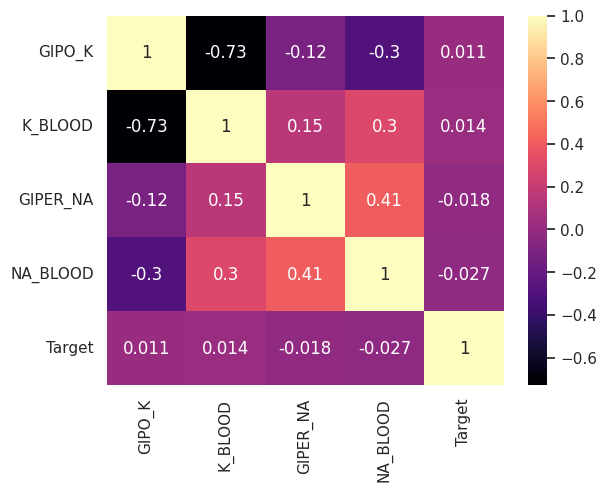

In [ ]:
# Correlation
var = ['GIPO_K', 'K_BLOOD', 'GIPER_NA', 'NA_BLOOD', 'Target']
sns.heatmap(df[var].corr(),annot=True,cmap='magma')

Noticing the correlation between the binary and continuous features, we deside to get rid of the binary ones and impute the missing values in the continuous ones as they are easier to deal with.

In [ ]:
# Dropping irrelevant features
df = df.drop(['GIPO_K', 'GIPER_NA'], axis=1)

When we have multiple variables with missing values, we can't just directly use Regression Imputation to impute one of them as the predictors contain missing data themselves. We can avoid this situation by initially imputing all the variables with missing values using some trivial methods like Simple Random Imputation (we impute the missing data with random observed values of the variable) which is later followed by Regression Imputation of each of the variables iteratively.

In [ ]:
missing_columns = ["K_BLOOD", "NA_BLOOD"]

The function random_imputation replaces the missing values with some random observed values of the variable. The method is repeated for all the variables containing missing values, after which they serve as parameters in the regression model to estimate other variable values.

Simple Random Imputation is one of the crude methods since it ignores all the other available data and thus it's very rarely used. But it serves as a good starting point for regression imputation.

In [ ]:
def random_imputation(df, feature):

    number_missing = df[feature].isnull().sum()
    observed_values = df.loc[df[feature].notnull(), feature]
    df.loc[df[feature].isnull(), feature + '_imp'] = np.random.choice(observed_values, number_missing, replace = True)

    return df

In [ ]:
import numpy as np

for feature in missing_columns:
    df[feature + '_imp'] = df[feature]
    df = random_imputation(df, feature)

In Deterministic Regression Imputation, we replace the missing data with the values predicted in our regression model and repeat this process for each variable.

In [ ]:
from sklearn import linear_model

deter_data = pd.DataFrame(columns = ["Det" + name for name in missing_columns])

for feature in missing_columns:

    deter_data["Det" + feature] = df[feature + "_imp"]
    parameters = list(set(df.columns) - set(missing_columns) - {feature + '_imp'})

    #Create a Linear Regression model to estimate the missing data
    model = linear_model.LinearRegression()
    model.fit(X = df[parameters], y = df[feature + '_imp'])

    #observe that I preserve the index of the missing data from the original dataframe
    deter_data.loc[df[feature].isnull(), "Det" + feature] = model.predict(df[parameters])[df[feature].isnull()]

In [ ]:
# Checking if the imputation is correct
print("Missing values in K_BLOOD:", df.K_BLOOD.isna().sum())
equal = (deter_data.DetK_BLOOD == df.K_BLOOD).sum()
print("Values in K_BLOOD which stay the same:", equal)
print("N. of imputed values in K_BLOOD:", df.shape[0]-equal)
print("\n")
print("Missing values in NA_BLOOD:", df.NA_BLOOD.isna().sum())
equal = (deter_data.DetNA_BLOOD == df.NA_BLOOD).sum()
print("Values in NA_BLOOD which stay the same:", equal)
print("N. of imputed values in NA_BLOOD:", df.shape[0]-equal)

Missing values in K_BLOOD: 325
Values in K_BLOOD which stay the same: 1229
N. of imputed values in K_BLOOD: 325


Missing values in NA_BLOOD: 328
Values in NA_BLOOD which stay the same: 1226
N. of imputed values in NA_BLOOD: 328


In [ ]:
# Substitution of the imputed values in the dataset
df[['K_BLOOD', 'NA_BLOOD']] = deter_data
df = df.drop(['K_BLOOD_imp', 'NA_BLOOD_imp'], axis=1)

Last check point.

In [ ]:
# Vector containing the NaN of each variables
nanvector = df.isna().sum()
nanvector_sorted = nanvector.sort_values(ascending = True)

# Print if there are still variables to be imputed!
for i in range(0,df.shape[1]):
  if nanvector_sorted[i] != 0:
      print(nanvector_sorted.index[i], nanvector_sorted[i],
            '(', nanvector_sorted[i]*100/df.shape[0], '%)')

# Missing values imputation via MICE

We do Multiple Imputation by Chained Equations (MICE).

In [ ]:
df_mice.isna().sum().sum()

6393

In [ ]:
# explicitly require this experimental feature
from sklearn.experimental import enable_iterative_imputer  # noqa
# now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer

I divide the dataset into continuos and categorical variables, since the strategy to use to initialize the missing values is different: mean for continous and most frequent for categorical. Then I run 2 different processes of imputation, separately.

In [ ]:
# Continuous variables
ID = list(df_mice['ID']) # save ID
df_mice = df_mice.drop(columns='ID') # drop ID from df_mice
contnames = ['AGE','S_AD_ORIT','D_AD_ORIT','K_BLOOD','NA_BLOOD','ALT_BLOOD','GIPER_NA','AST_BLOOD','L_BLOOD','ROE']
df_mice_cont = df_mice[contnames]

In [ ]:
imputer_cont = IterativeImputer(random_state=0, max_iter=100)
df_mice_cont = imputer_cont.fit_transform(df_mice_cont)

In [ ]:
df_mice_cont = pd.DataFrame(df_mice_cont, columns = contnames)

In [ ]:
df_mice_cont

,AGE,S_AD_ORIT,D_AD_ORIT,K_BLOOD,NA_BLOOD,ALT_BLOOD,GIPER_NA,AST_BLOOD,L_BLOOD,ROE
0,77.0,180.000000,100.000000,4.700000,138.000000,0.369545,0.000000,0.232954,8.000000,16.000000
1,55.0,120.000000,90.000000,3.500000,132.000000,0.380000,0.000000,0.180000,7.800000,3.000000
2,52.0,180.000000,100.000000,4.000000,132.000000,0.300000,0.000000,0.110000,10.800000,12.641677
3,68.0,120.000000,70.000000,3.900000,146.000000,0.750000,0.000000,0.370000,9.201301,14.190535
4,60.0,160.000000,90.000000,3.500000,132.000000,0.450000,0.000000,0.220000,8.300000,13.911031
...,...,...,...,...,...,...,...,...,...,...
1549,77.0,150.000000,90.000000,3.900000,136.000000,0.230000,0.000000,0.180000,5.500000,20.000000
1550,77.0,110.000000,70.000000,3.700000,130.000000,1.050000,0.000000,0.520000,12.800000,6.000000
1551,70.0,137.278295,83.497536,4.190869,136.596343,0.444640,0.020428,0.255764,8.783366,15.120104
1552,79.0,110.000000,70.000000,3.100000,136.000000,0.450000,0.000000,0.450000,7.500000,4.000000


In [ ]:
df_mice_cont.isna().sum().sum()

0

In [ ]:
allnames = df_mice.columns
catnames = list(set(allnames)-set(contnames))

df_mice_cat = df_mice[catnames]

In [ ]:
imputer_cat = IterativeImputer(random_state=0, initial_strategy='most_frequent', max_iter=100)
df_mice_cat = imputer_cont.fit_transform(df_mice_cat)

In [ ]:
df_mice_cat = pd.DataFrame(df_mice_cat, columns = catnames)

In [ ]:
df_mice_cat

,n_p_ecg_p_10,np_05,ANT_CA_S_n,fibr_ter_01,n_r_ecg_p_08,R_AB_1_n,TRENT_S_n,nr_04,R_AB_2_n,ritm_ecg_p_07,...,nr_03,zab_leg_01,lat_im,TIKL_S_n,np_09,endocr_01,zab_leg_02,ritm_ecg_p_06,fibr_ter_08,INF_ANAM
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,2.0
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,...,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,1.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.000000,1.0,...,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1549,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1550,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.152613,0.0,...,0.0,0.0,1.247114,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1551,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.272827,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1552,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.494063,0.0,...,0.0,0.0,1.042653,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [ ]:
df_mice_cat.isna().sum().sum()

0

I check I obtain values in a sensical range, looking to max values.

In [ ]:
for i in catnames:
  print(df_mice_cat.max()[i],i)

1.0 n_p_ecg_p_10
1.0 np_05
1.0 ANT_CA_S_n
1.0 fibr_ter_01
1.0 n_r_ecg_p_08
3.0 R_AB_1_n
1.0 TRENT_S_n
1.0 nr_04
3.0 R_AB_2_n
1.0 ritm_ecg_p_07
1.0 O_L_POST
1.0 LID_S_n
1.0 IM_PG_P
1.0 n_p_ecg_p_05
1.0 n_r_ecg_p_05
1.0 nr_11
1.0 fibr_ter_03
1.0 np_08
4.0 ant_im
1.0 n_r_ecg_p_06
1.0 fibr_ter_06
1.0 nr_07
1.0 n_p_ecg_p_06
9.0 TIME_B_S
1.0 SIM_GIPERT
1.0 GT_POST
1.0 ritm_ecg_p_04
1.0 NITR_S
1.0 ASP_S_n
1.0 n_r_ecg_p_01
6.0 STENOK_AN
1.0 np_04
1.0 ritm_ecg_p_02
1.0 n_r_ecg_p_09
3.0 GB
1.0 endocr_02
1.0 n_p_ecg_p_04
4.0 ZSN_A
1.0 n_p_ecg_p_12
1.0 n_r_ecg_p_10
4.0 NA_R_1_n
1.0 SEX
8.393204662071554 DLIT_AG
1.0 LID_KB
1.0 nr_02
1.0 NOT_NA_KB
3.0 R_AB_3_n
3.0 NA_R_2_n
1.0 GEPAR_S_n
1.0 fibr_ter_02
1.1142006880444288 NA_KB
1.0 endocr_03
1.0 np_01
1.0 n_p_ecg_p_11
4.0 inf_im
4.0 NOT_NA_1_n
1.0 GIPO_K
4.0 post_im
1.0 zab_leg_06
2.0 IBS_POST
1.0 np_10
1.0 ritm_ecg_p_08
1.0 fibr_ter_05
1.0 n_r_ecg_p_03
1.0 n_p_ecg_p_01
1.0 nr_08
3.0 NOT_NA_2_n
1.0 n_r_ecg_p_02
1.0 K_SH_POST
1.0 fibr_ter_07
1.0 zab_l

In [ ]:
df_mice_cat = df_mice_cat.round()

In [ ]:
df_mice_cont['ID'] = ID

In [ ]:
df_mice_cont.isna().sum().sum()

0

In [ ]:
df_mice_cat['ID'] = ID

In [ ]:
df_mice_cat.isna().sum().sum()

0

In [ ]:
df_imputed = pd.merge(df_mice_cont,df_mice_cat,on='ID')

In [ ]:
df_imputed

,AGE,S_AD_ORIT,D_AD_ORIT,K_BLOOD,NA_BLOOD,ALT_BLOOD,GIPER_NA,AST_BLOOD,L_BLOOD,ROE,...,nr_03,zab_leg_01,lat_im,TIKL_S_n,np_09,endocr_01,zab_leg_02,ritm_ecg_p_06,fibr_ter_08,INF_ANAM
0,77.0,180.000000,100.000000,4.700000,138.000000,0.369545,0.000000,0.232954,8.000000,16.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
1,55.0,120.000000,90.000000,3.500000,132.000000,0.380000,0.000000,0.180000,7.800000,3.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,52.0,180.000000,100.000000,4.000000,132.000000,0.300000,0.000000,0.110000,10.800000,12.641677,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,68.0,120.000000,70.000000,3.900000,146.000000,0.750000,0.000000,0.370000,9.201301,14.190535,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,60.0,160.000000,90.000000,3.500000,132.000000,0.450000,0.000000,0.220000,8.300000,13.911031,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1549,77.0,150.000000,90.000000,3.900000,136.000000,0.230000,0.000000,0.180000,5.500000,20.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1550,77.0,110.000000,70.000000,3.700000,130.000000,1.050000,0.000000,0.520000,12.800000,6.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1551,70.0,137.278295,83.497536,4.190869,136.596343,0.444640,0.020428,0.255764,8.783366,15.120104,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1552,79.0,110.000000,70.000000,3.100000,136.000000,0.450000,0.000000,0.450000,7.500000,4.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [ ]:
df_imputed.isna().sum().sum()

0

I rerun the process with no distinction into continuos and categorical variables, in terms of initialization of missing values imputation with mean value for all dataset.

In [ ]:
imputer = IterativeImputer(random_state=0)
df_mice = imputer_cont.fit_transform(df_mice)

df_mice = pd.DataFrame(df_mice, columns = allnames)

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [ ]:
df_mice_cont = df_mice[contnames]
df_mice_cat = df_mice[catnames]

In [ ]:
df_mice = df_mice_cat.round()

In [ ]:
df_mice_cont['ID'] = ID
df_mice_cat['ID'] = ID
df_imputed_unique = pd.merge(df_mice_cont, df_mice_cat, on='ID')

In [ ]:
df_imputed_unique.isna().sum().sum()

0

I do the check that sistolic pressure < diastolic pressure on imputed data.

In [ ]:
df_imputed.loc[(df_imputed.S_AD_ORIT - df_imputed.D_AD_ORIT) < 0][['SEX', 'AGE', 'GB', 'SIM_GIPERT', 'S_AD_ORIT', 'D_AD_ORIT', 'Target']]

,SEX,AGE,GB,SIM_GIPERT,S_AD_ORIT,D_AD_ORIT,Target


In [ ]:
df_imputed_unique.loc[(df_imputed_unique.S_AD_ORIT - df_imputed_unique.D_AD_ORIT) < 0][['SEX', 'AGE', 'GB', 'SIM_GIPERT', 'S_AD_ORIT', 'D_AD_ORIT', 'Target']]

,SEX,AGE,GB,SIM_GIPERT,S_AD_ORIT,D_AD_ORIT,Target


On both datasets that are no errors of this kind.

# Data saving

In [ ]:
df.to_csv('Final data clean manual.csv')

In [ ]:
from google.colab import files
df_imputed.to_csv('Final cleaned data mice.csv', encoding = 'utf-8-sig')
files.download('Final cleaned data mice.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
df_imputed_unique.to_csv('Final cleaned data mice unique.csv', encoding = 'utf-8-sig')
files.download('Final cleaned data mice unique.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>